# 导入工具包

In [1]:
import cv2
import mediapipe as mp

#进度条库
from tqdm import tqdm
import time
import matplotlib.pyplot as plt

#使用ipython魔法方法，将绘制得到的图像直接嵌入在notebook单元格中
%matplotlib inline

In [2]:
#定义可视化图像函数
def look_img(img):
    '''opencv读入图像格式为BGR。matplotlib可视化格式为RGB，因此需将BGR转化为RGB'''
    img_RGB = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img_RGB)
    plt.show()

# 导入手部关键点检测模型

In [3]:
#导入solution
mp_hands = mp.solutions.hands

#导入模型
hands = mp_hands.Hands(static_image_mode=False,       #是静态图片还是连续视频帧
                      max_num_hands=4,                #最多检测几只手
                      min_detection_confidence=0.5,   #置信度阈值
                      min_tracking_confidence=0.5,    #追踪阈值
                      )

#导入绘图函数
mpDraw = mp.solutions.drawing_utils

# 读入图像

In [4]:
#从图片文件夹读入图像，opencv读入格式为BGR格式

img = cv2.imread('./images/Camera1.jpg')

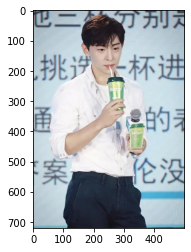

In [5]:
look_img(img)

In [6]:
img.shape

(720, 500, 3)

In [7]:
# 水平镜像翻转图像，使得图中的左右手与真实左右手相对应
#参数，1：水平翻转，0：竖直翻转，-1：水平和竖直都翻转
img = cv2.flip(img,1)

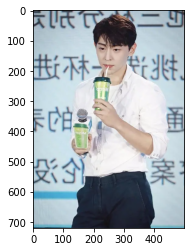

In [8]:
look_img(img)

# 将图像输入模型，获取预测结果

In [9]:
# BGR转RGB
img_RGB = cv2.cvtColor(img,cv2.COLOR_BGRA2RGB)

#将RGB图像输入模型。获取预测结果
results = hands.process(img_RGB)

In [10]:
results

mediapipe.python.solution_base.SolutionOutputs

In [11]:
#预测出手的个数
len(results.multi_hand_landmarks)

1

# 可视化检测结果

In [12]:
if results.multi_hand_landmarks:   #如果检测到手
    #遍历每一只检测出的手
    for hand_idx in range(len(results.multi_hand_landmarks)):
        hand_21 = results.multi_hand_landmarks[hand_idx]    #获取手的所有关键点坐标
        mpDraw.draw_landmarks(img,hand_21,connections = mp_hands.HAND_CONNECTIONS)

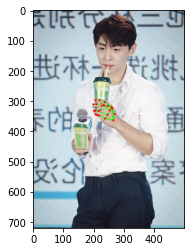

In [13]:
look_img(img)

In [14]:
cv2.imwrite('A.jpg',img)

True